In [1]:
#!pip install geoplot
import geoplot as gplt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import geoplot.crs as gcrs
import mapclassify as mc

In [2]:
df=pd.read_excel('Acc.xlsx')
df.head()
#df.columns

,SN,Acceleratrs,Short form,Altitude,Longitude
0,1,Jefferson Lab,CEBAF,37.094583,-76.481583
1,1,ELSA,ELSA,50.726389,7.127444
2,1,Mainzer Microtron,MAMI,49.991972,8.236250
3,1,Idaho Accelerator Center,IAC,42.868539,-112.410095
4,1,The Neptune Laboratory,NEPTUNE,34.070730,-118.441086


In [3]:
df.SN.unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
df=df.drop(['Acceleratrs',
            'Short form'],axis=1)

In [5]:
df.head()

,SN,Altitude,Longitude
0,1,37.094583,-76.481583
1,1,50.726389,7.127444
2,1,49.991972,8.236250
3,1,42.868539,-112.410095
4,1,34.070730,-118.441086


In [6]:
df=df.dropna()
#df.SN= df.SN.to_string()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SN         110 non-null    int64  
 1   Altitude   110 non-null    float64
 2   Longitude  110 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.4 KB


In [7]:
from shapely.geometry import Point
data_points = df.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Altitude'])),
    axis='columns'
)
data_points

0       POINT (-76.481583 37.094583)
1         POINT (7.127444 50.726389)
2          POINT (8.23625 49.991972)
3      POINT (-112.410095 42.868539)
4       POINT (-118.441086 34.07073)
                   ...              
105       POINT (50.03699 36.330209)
106         POINT (9.88363 53.57959)
107       POINT (8.679916 49.930675)
108      POINT (13.129864 52.411278)
109      POINT (141.32683 40.951875)
Length: 110, dtype: object

In [8]:
df_coded=gpd.GeoDataFrame(df,geometry=data_points)
df_coded.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         110 non-null    int64   
 1   Altitude   110 non-null    float64 
 2   Longitude  110 non-null    float64 
 3   geometry   110 non-null    geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 4.3 KB


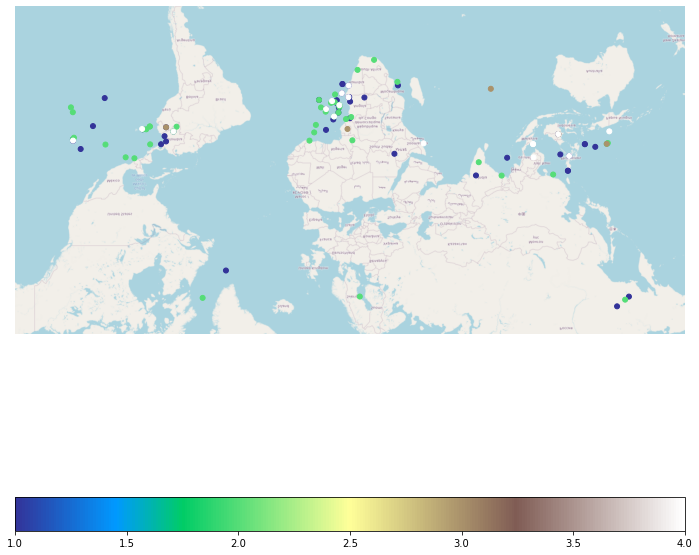

In [9]:
ax = gplt.webmap(df_coded, projection=gcrs.WebMercator(),
                 linewidth=1,figsize=(12,20))
gplt.pointplot(df_coded, ax=ax,hue=df_coded['SN'],cmap='terrain',
              legend=True,legend_kwargs={'orientation': 'horizontal'})

In [10]:
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [12]:
d=world[world.continent=='Antarctica']
world=world.drop(d.index)

<Figure size 432x288 with 0 Axes>

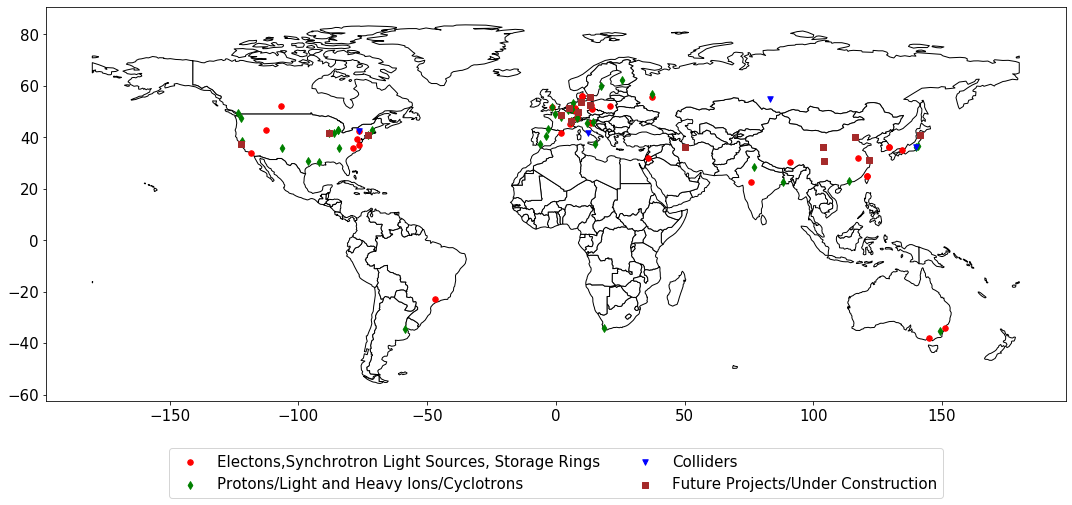

In [22]:
n=30
%matplotlib inline
plt.figure()
base=world.plot(color='white',edgecolor='black',figsize=[15,20])

df_coded[df_coded.SN==1].geometry.plot(ax=base,color='red',markersize=n,marker='o',
                                      label='Electons,Synchrotron Light Sources, Storage Rings')
df_coded[df_coded.SN==2].geometry.plot(ax=base,color='green',
                                       markersize=n, marker='d',
                                      label='Protons/Light and Heavy Ions/Cyclotrons')
df_coded[df_coded.SN==3].geometry.plot(ax=base,color='blue',markersize=n, marker='v',
                                      label='Colliders')
df_coded[df_coded.SN==4].geometry.plot(ax=base,color='brown',markersize=n, marker='s',
                                      label='Future Projects/Under Construction')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1),ncol=2, fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()